<font size=7><b> Introduction to Electrophysiology

This notebook will teach you the basics of analyzing [electrophysiology](https://en.wikipedia.org/wiki/Electrophysiology) data. In this homework we will perform some analysis on the data that Prof. Tal Sharf presented on Wednesday (April, 17). Prof. Sharf's experiment was done to determine the affects of a drug called [diazepam](https://en.wikipedia.org/wiki/Diazepam), on [cerebral organoids](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.). 



<font color="red"><b>Note:</b> This homework will be due April 18th at 11:59pm PT.  Make sure to complete the exercises at the bottom of this notebook.

In [23]:
%run "electrophysiology_source_code.ipynb"

# <font color="gray"> Reading Material

<font color="red"> Required Reading:
* [Professor Sharf's paper on Neural Circuitry](reading_material/Tal_Neural_Circuitry.pdf)
* [Spike Time Tiling Introduction](./reading_material/Spike_Time_Tiling.pdf)

Briskly read through [Professor Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf). Some of the exercises require you to read the first few pages. [This paper's](./reading_material/Spike_Time_Tiling.pdf) discussion on Spike Time Tilling is also required reading. [braingeneerspy](https://github.com/braingeneers/braingeneerspy) is the name of the python package used by the Haussler lab for data analsyis. We will be using the [analysis toolkit](https://github.com/braingeneers/braingeneerspy/tree/master/src/braingeneers/analysis) from that package..

**Other Material**
* Wiki Articles:
    * Basic wiki articles on [electrophysiology](https://en.wikipedia.org/wiki/Electrophysiology) , [diazepam](https://en.wikipedia.org/wiki/Diazepam) , [cerebral organoids](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.), [action potential](https://en.wikipedia.org/wiki/Action_potential)
    * Scholarpedia article on [Spike train analysis](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony)
* Research Papers
    * Review paper on [cerebral organoids](./reading_material/rise_of_organoids.pdf)
    * Professor  [Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf)
    * [Spike Time Tilling](./reading_material/Spike_Time_Tiling.pdf) paper



#  Spike Trains

## Spike Train

A "spike train" (or "spike raster") is an incredibly powerful tool used to analyze neural data. In this notebook you will learn to do some basic analysis on spike train data. A spike train is a 2D matrix where each row represents a neuron, and each column is a single moment in time. Each blue dot in the matrix is a moment in time where a neuron emits a signal to other neurons. This signal can be called a "spike", a "fire", or, more scientifically, an "action potential".


When you look at a spike train, you see every single moment at which a neuron "fires". [This link](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony) is a great resource if you want to take a deeper dive into spike train analysis. Below is the complete spike raster for the control dataset from the the experiment, `Spike_Raster_Control.mat`.

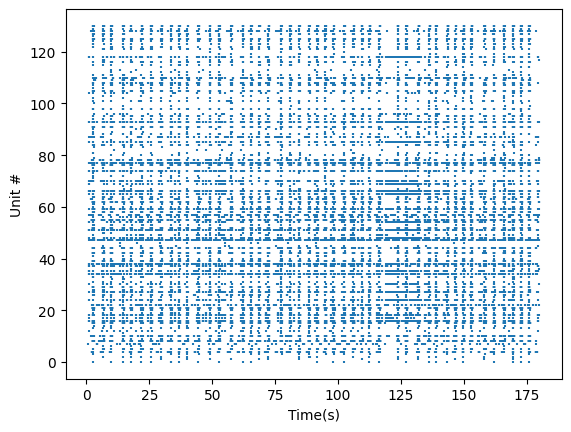

In [24]:
plot_raster(data_control)

## Analysing the Train

When scientists analyze spike trains, they are especially interested in looking at the "neural bursts" that occur. A burst is defined a short window of activity where the neurons are especially active. Looking at the spike raster above you might be able to pick out the neural bursts (the "veritcal lines"), however, bursts are easier to distinguish when you zoom in on the dataset.  

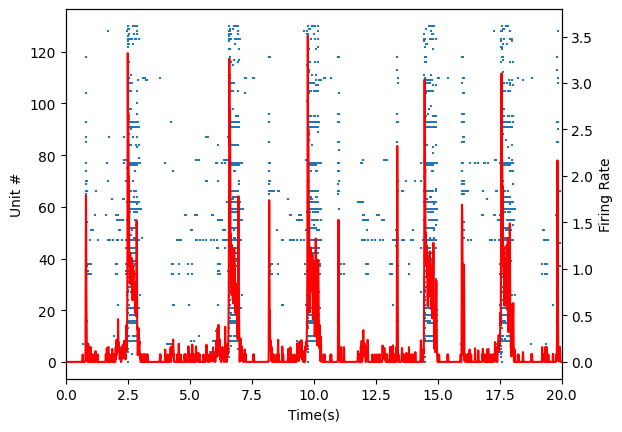

In [25]:
raster_analysis(data_control)

In the example above we have zoomed in on the first 20 seconds of the spike raster shown above. This raster also contains a red line that show the relative activity of neurons at that timestep. Looking at this 20 second window, I see **5** bursts. Defining a burst can be a little tricky. Notice that there are also areas of small activity in between bursts. Below I highlight where I see bursts and areas of activity in the spike raster.

![alt text](.images/burst_analysis.png "Title")

Neuroscientists are interested in bursts not just because they are the areas of most activity, but most importantly, because these regions display repeated patterns of consistent relationships between neurons. Below we zoom in even more on to the first two bursts of the spike raster (8 second window). Notice that the neural activity pattern (red line) looks similar for both bursts. Also, if you look at individual neurons (blue dots) you'll see that they follow similar firing patterns within both bursts.

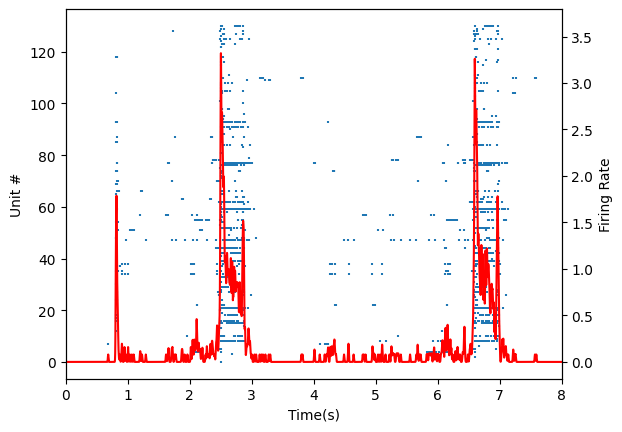

In [26]:
raster_analysis(data_control, seconds=8)

# Neural Relationships

To build the type of beautiful circuit diagrams that were discussed in class, scientists must work backwards by analyzing the firing patterns they see from neurons in the brain. They use different tools to parse out the relationship between neurons.

## Interspike Intervals

Before we attempt to answer the complicated question of "what is the relationship patterns between different neurons?", lets start with a much simpler question: "what is the relationship pattern between a single neuron and itself?". In other words, what properties can we say about the firing pattern of a single neuron?

This is a more complicated question than it might at first seem. Neurons follow a somewhat random behaviour, it is not always certain when, or how often, a neuron will fire. Lets take a "data first" approach to gain a better understanding of when neurons fire. We are going to consider the interval of time that passes in between each moment a neurons fires, this is called the interspike interval. Here is a [brief summary](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/wiki/Interspike_interval.html#:~:text=The%20interspike%20interval%20is%20the,messengers%20to%20affect%20other%20neurons.) of interspike intervals. Below we see a histogram of the interspike interval for all the neurons in our spike raster from above. What probability distribution does the graph below look like?

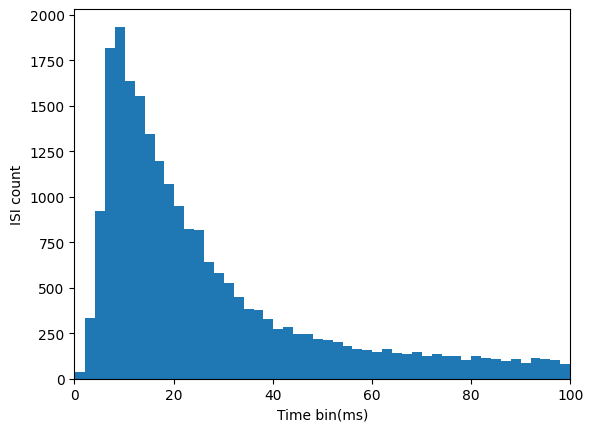

In [27]:
interspike(data_control)

<p>&nbsp</p>

<center><b>Example of Interspike Intervals</b></center>

![alt text](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/w/images/thumb/3/38/Spiketimes.png/300px-Spiketimes.png)

The mathematicians in the group will be delighted to know that intervals between spikes for a neuron tend to follow a [poission distribution](https://en.wikipedia.org/wiki/Poisson_distribution). This is not a coincidence, read the wiki article to understand why. Many of the beautiful (and complicated) statistical models used to describe the circuit patterns between neurons use the poission distribution as the fundemental building block of more complicated algorithms.

## Correlation Matrix

We have just shown that we can consider each neuron to act as a random variable, with a poission probability of firing at any given time. Given that we are now working with random variables, it is natural to use a correlation matrix to measure the relative strength in relationship between neurons. A correlation matrix displays the correlation between every pair of neurons in our spike raster. 

Below is a correlation matrix created from the spike raster above. Postively correlated neurons show up as a green dot in the plot, where negatively correlated neurons are deep blue. One could imageine strongly correlated neurons as being part of the same cicuit, or even touching. Where negatively correlated neurons may perhaps display some inhibitory cell stopping other neurons from firing. The true interpretation of a correlation matrix is much more vague than this. In reality, more nuanced techniques are used to tease apart cell circuitry. However, as the homework will show, the correlation matrix is still useful for discerning changes in neural behaviour.

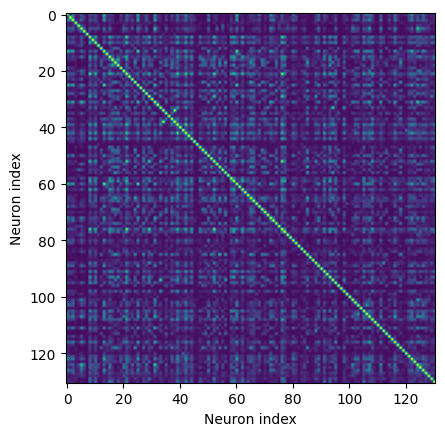

In [28]:
correlation(data_control)       

<p>&nbsp</p>
<center><b>Summary of Correlation</b></center>

![alt text](https://www.mathsisfun.com/data/images/correlation-examples.svg)

# <font color="red">Exercises

The exercises below will provide you with a better understanding of how neural data is analyzed. Note, when completing these exercises, please remember to show your work. If you typed any code to find a solution, please write down your code.

## Prof. Sharf's Paper (5 Points Total)

Read through the first few pages of [Professor Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf). Then answer the following questions.

### Breakthrough Device (3 Points)

What newly developed device has enabled high-resolution readouts of neural activity? What is the name of the specific device (model/maker) used in this paper? How many electrodes can it record from simultaneously?

<font color="green"><b>Answer

A newly developed device that has enabled high-resolution readouts of neural activity is the high-density CMOS-based microelectrode array (MEA). In this study, the researchers used the MaxOne system developed by Maxwell Biosystems (Zurich, Switzerland). This device contains a total of 26,400 routable electrodes, with the capability to record from up to 1,024 electrodes simultaneously, allowing for detailed mapping of neuronal activity across human brain organoid slices.

### Organoid Models (2 Points)

How long was neural activity recorded for after the cerebral organoid was placed on the recording device? What is the name of 2 drugs that were used to change the neural activity of organoids in the experiment?

<font color="green"><b>Answer

Neural activity was recorded for up to six months after the cerebral organoids were placed on the high-density recording device. Spontaneous spiking activity began approximately two weeks after placement, with firing rates progressively increasing and reaching peak activity around the six-month mark. To modulate neural activity in the organoids during the experiment, two pharmacological agents were used: diazepam, a benzodiazepine known to alter spiking patters and netword dynamics, and tetrodotoxin (TTX), a sodium channel blocker that significantly reduced overall spiking activity. 

## Curating Raw Data (2 Points Total)

When a neuron emits a signal to other cells, it can be called a "spike", a "fire", or, more scientifically, an "action potential". The spike raster that you saw in the lecture above is the final product from considerable work done on the "raw data" recorded from electrodes. A microscopic 2D grid of electrodes calledn an [MEA](https://ars.els-cdn.com/content/image/1-s2.0-S0165027099001132-gr1.jpg) records an "action potential" across multiple locations of the neuron's body. This [wiki article](https://en.wikipedia.org/wiki/Action_potential), gives a good example of what an action potential looks like. A major step in the process of finding neurons from raw data, involves looking at "footprints" of action potentials from prospective neurons. These "footprints" are representative 2D depictions of raw data coming from electrods on the MEA. The **4** images below are footprints of prospective neurons.



For the **4** images below, classify them as either being an "action potential" or as being "noise". When determinning if a "neural footprint" is a spike or noise, consider the following-  The "spike" should be seen across multiple electrodes, furthermore, the neuron should remain consistent across multiple electrodes. There shouldn't be any significant changes in it's appearance.

<font color="orange"><b>Hint:</b> **2** of the images below are action potentials, and the other **2** are noise.

<font color="green"><b>Answer

<b>Image 1:</b>  action potential

<b>Image 2:</b>  noise

<b>Image 3:</b>  action potential

<b>Image 4:</b>  noise

<b><center>Image 1</center></b>
![alt text](.images/spike1.png "Title")

<b><center>Image 2</center></b>
![alt text](.images/spike2.png "Title")

<b><center>Image 3</center></b>
![alt text](.images/spike3.png "Title")

<b><center>Image 4</center></b>
![alt text](.images/spike4.png "Title")

## Analyzing Control Dataset (5 Points Total)

In this section we will calculate some summary statistics on the control dataset, `data_control`. `data_control` is a `SpikeData` object created using the [analysis package](https://github.com/braingeneers/braingeneerspy/blob/master/src/braingeneers/analysis/analysis.py) from the braingeneerspy python library.

### Basic Summary (3 Points)

Lets start my getting a basic summary of the spike raster, `data_control`. How many neurons are there in the recording? How long is the recording (in seconds)? In total, how many spikes occured across all neurons?

<font color="orange">**Hint:** While this question may at first appear oubvious, getting the answer with code may be harder than you expect. This is because `data_control` is coded as a sparse matrix to save on memory. One way of going about this answer is by looking at the variable `length` and some of the code inside of the `rates` function. Another approach is to use the function `raster` with bin size of 1.


<font color="green"><b>Answer

In [29]:
# Get the raster data with bin_size of 1 second
raster_data = data_control.raster(1)

# Number of neurons = number of rows in raster matrix
num_neurons = raster_data.shape[0]

# Recording length (seconds) = number of columns in raster matrix
recording_length = raster_data.shape[1]

# Total number of spikes = sum of all values in the raster matrix
total_spikes = raster_data.sum()

# Print the summary
print(f"Number of neurons: {num_neurons}")
print(f"Recording length: {recording_length} seconds")
print(f"Total number of spikes: {total_spikes}")


Number of neurons: 131
Recording length: 179880 seconds
Total number of spikes: 31756


### Calculate Firing rate (1 Point)

The firing rate of a neuron is a measure of how often the cell fires. It is defined as the total number of spikes divided by total time (in seconds):

$$
\dfrac{\text{spikes}}{\text{time}}
$$

What is the average firing rate for a single neuron in the control dataset?

<font color="orange">**Note:** Here we are asking for the number of spike per second per neuron- aka: the firing rate of the entire recording divided by the number of neurons in the recording.

<font color="green"><b>Answer

In [30]:
# Get the raster data with bin_size of 1 second
raster_data = data_control.raster(1)

# Number of neurons = number of rows in raster matrix
num_neurons = raster_data.shape[0]

# Recording length (seconds) = number of columns in raster matrix
recording_length = raster_data.shape[1]

# Total number of spikes = sum of all values in the raster matrix
total_spikes = raster_data.sum()

# Print the summary
print(f"Number of neurons: {num_neurons}")
print(f"Recording length: {recording_length} seconds")
print(f"Total number of spikes: {total_spikes}")

# Calculate average firing rate (spikes per second per neuron)
average_firing_rate = total_spikes / (recording_length * num_neurons)

# Print the firing rate with higher precision
print(f"Average firing rate per neuron: {average_firing_rate:.6f} spikes/sec")


Number of neurons: 131
Recording length: 179880 seconds
Total number of spikes: 31756
Average firing rate per neuron: 0.001348 spikes/sec


### Calculate Coefficient of Variation (1 Point)

Given the interspike intervals (ISI's) of a dataset, the "Coefficient of Variation" (CV) is defined as the standard deviation of the ISI's divided by the mean.

$$
\dfrac{\text{sd}\begin{pmatrix}\text{ISI}\end{pmatrix}}{\text{mean}\begin{pmatrix}\text{ISI}\end{pmatrix}}
$$

In neuroscience the CV is commonly used as a measure of randomness in the dataset. A CV of of 1 means that the data folllows a more poission-like distribution. A smaller number for the CV tends to mean that the data is less random. Calculate the CV for the control dataset.

<font color="orange">**Hint:** Use the code inside of the `interspike` function for your ISI's, however, please make sure not to use the variable `isis_raw` when doing the CV calculation.

<font color="green"><b>Answer

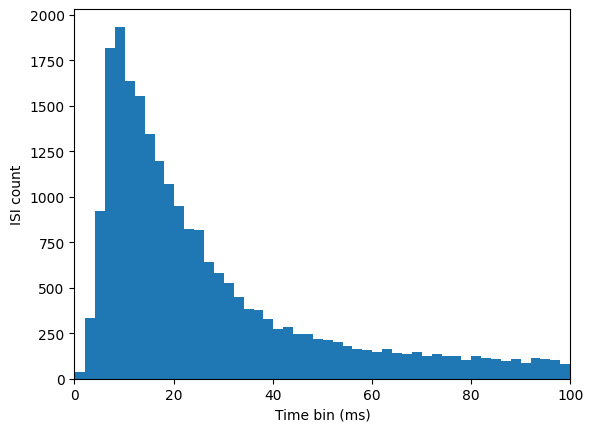

Coefficient of Variation (CV) for Control Dataset: 0.8289


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Get ISIs using the code from interspike function
isis_raw = data_control.interspike_intervals()

# Filter ISIs: remove intervals > 100ms
isis = []
for i in range(len(isis_raw)):
    isi = isis_raw[i]
    isis = isis + isi[isi < 100].tolist()

# Plot ISIs
plt.xlim(0, 100)
plt.hist(isis, bins=50)
plt.xlabel('Time bin (ms)')
plt.ylabel('ISI count')
plt.show()

# Calculate CV
isi_std = np.std(isis)
isi_mean = np.mean(isis)
cv = isi_std / isi_mean

# Print CV
print(f"Coefficient of Variation (CV) for Control Dataset: {cv:.4f}")


## Analyzing Diazepam Dataset (11.5 Points Total)

In this section we will analyze the results from the cerebral organoid after it was given the drug Diazepam. Specifically, we will be comparing these results the control data to see what affects diazepam has on the tissue.

<font color="orange">**Hint:** When answering the questions below, it's important to remember the general affect that Diazepam has on neurons. In general, diazepam **decreases neural activity**, however, firing patterns between neurons become **more organized** and less random. 

### Load Data (1 Point)

Create a variable called `data_diazepam` which loads the data from `Spike_Raster_Diazepam.mat` into a Braingeneerspy `SpikeData` object. Note, this is the same way we load the control dataset in the source code.

<font color="green"><b>Answer

In [32]:
data_diazepam = mat_to_spikeData('/home/jovyan/data/ephys/2023-08-28-e-Math_Mind_Class/HW2-Electrophysiology/Spike_Raster_Diazepam.mat')


### Basic Summary (3 Points)

For the dataset, `data_diazepam`, calculate how many neurons there are, how long the recording is (in seconds), and the total number of spikes that occured.

<font color="green"><b>Answer

In [33]:
# Get the raster data with bin_size of 1 second
raster_data = data_diazepam.raster(1)

# Number of neurons = number of rows in raster matrix
num_neurons = raster_data.shape[0]

# Recording length (seconds) = number of columns in raster matrix
recording_length = raster_data.shape[1]

# Total number of spikes = sum of all values in the raster matrix
total_spikes = raster_data.sum()

# Print the summary
print(f"Number of neurons: {num_neurons}")
print(f"Recording length: {recording_length} seconds")
print(f"Total number of spikes: {total_spikes}")


Number of neurons: 131
Recording length: 179990 seconds
Total number of spikes: 20971


### Firing Rate (1 Point)

What is the average firing rate for a single neuron in the diazepam dataset?  How does this compare to the control dataset? Is this consistent with what we expect from Diazepam?

<font color="orange">**Note:** Like before, we are asking for the number of spike per second per neuron

<font color="green"><b>Answer

In [34]:
# Get the raster data with bin_size of 1 second
raster_data = data_diazepam.raster(1)

# Number of neurons = number of rows in raster matrix
num_neurons = raster_data.shape[0]

# Recording length (seconds) = number of columns in raster matrix
recording_length = raster_data.shape[1]

# Total number of spikes = sum of all values in the raster matrix
total_spikes = raster_data.sum()

# Print the summary
print(f"Number of neurons: {num_neurons}")
print(f"Recording length: {recording_length} seconds")
print(f"Total number of spikes: {total_spikes}")

num_neurons = raster_data.shape[0]
recording_length = raster_data.shape[1]   # in seconds
total_spikes = raster_data.sum()

# Calculate average firing rate per neuron
average_firing_rate = total_spikes / (recording_length * num_neurons)

print(f"Average firing rate per neuron: {average_firing_rate:.6f} spikes/sec")


Number of neurons: 131
Recording length: 179990 seconds
Total number of spikes: 20971
Average firing rate per neuron: 0.000889 spikes/sec


### Calculate Coefficient of Variation (1 Point)

Calculate the CV score for Diazepam dataset. Compare your result to the control dataset. Is this result consistent with the general affects we expect from Diazepam?

<font color="green"><b>Answer

The Coefficient of Variation (CV) for the Diazepam dataset was calculated to be 0.5999, whereas the CV for the control dataset was 0.8289. This lower CV value in the Diazepam-treated sample indicates that neuronal firing became more result and less varaible following exposure to the drug. 
The result is consistent with the known effects of Diazepam. Diazepam is recognized for its ability to decrease neural activity and promote more organized firing patterns. A higher CV, as seen in the control dataset, reflects greater randomness in neuronal firing, characteristics of untreated, spontaneous neural activity. In contrast, the reduced CV in the Diazepam dataset suggests that neurons are firing in a more predictable, rhythmic manner, aligning with Diazepam's role in enhancing inhibitory signaling and stabilizing neural activity. 

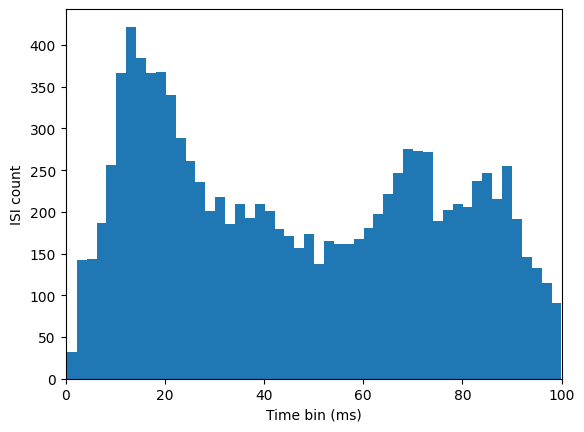

Coefficient of Variation (CV) for Diazepam dataset: 0.5999


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get ISIs from data_diazepam
isis_raw = data_diazepam.interspike_intervals()

# Filter ISIs: keep only intervals <= 100ms
isis = []
for i in range(len(isis_raw)):
    isi = isis_raw[i]
    isis = isis + isi[isi < 100].tolist()

# Optional: Plot ISIs
plt.xlim(0, 100)
plt.hist(isis, bins=50)
plt.xlabel('Time bin (ms)')
plt.ylabel('ISI count')
plt.show()

# Step 2: Calculate CV
isi_std = np.std(isis)
isi_mean = np.mean(isis)
cv_diazepam = isi_std / isi_mean

# Print CV
print(f"Coefficient of Variation (CV) for Diazepam dataset: {cv_diazepam:.4f}")


### Bursting Behaviour (4 Points)

#### Macro

Create a zoomed in plot of the spike raster for the diazepam dataset that shows the first 20 seconds of the recording. How many bursts do you see? How does this compare to the number of bursts you saw in the control dataset? Are these results consistent with figures in Tal's paper? If so, which figure?

<font color="green"><b>Answer

A zoomed-in spike raster polot of the first 20 seconds shows clear differences between Diazepam and control datasets. In the Diazepam dataset, approximately 8 distinct bursts were observed, characterized by highly synchronized firing and minial activity between bursts. This suggests that Diazepam enhances network synchonization by increasing GABAergic inhibition, leading to more rhythmic and repetitive burst patters while supressing spontaneous activity outside of bursts. 

In contrast, the control dataset displayed around 5 bursts within the same timeframe. These bursts were less frequent and interpersed with higher levels of spontaneous, irregular neural activity, indicating less synchronized network behavior. Overall, these results align with the patterns reported in Figure 4a of Tal's paper, where Diazepam treatment led to increased burst regularity and reduced inter-burst firing compared to control conditions. 

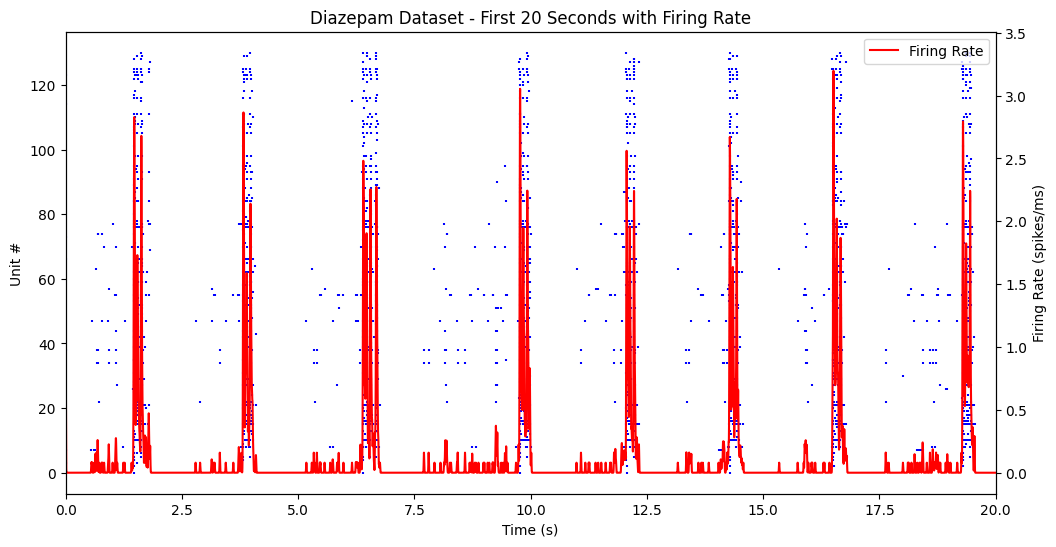

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def raster_analysis(sd, seconds=20):
    """
    Plots a zoomed-in spike raster along with the smoothed population firing rate.

    Parameters:
    sd : SpikeData object (from Braingeneerspy)
        The spike data to analyze.
    seconds : int
        Duration to zoom in on (default is 20 seconds).
    """
    # Get spike raster coordinates
    idces, times = sd.idces_times()

    # Compute population firing rate (bin size = 1 ms)
    pop_rate = sd.binned(bin_size=1)  # Firing rate per ms

    # Smooth the population rate using Gaussian filter
    sigma = 5
    pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float), sigma=sigma)

    # Create time axis in seconds
    t = np.linspace(0, sd.length, pop_rate.shape[0]) / 1000  # Convert ms to seconds

    # Plot raster and firing rate
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Raster plot
    ax1.scatter(times / 1000, idces, marker='|', s=2, color='blue')
    ax1.set_xlim(0, seconds)
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel('Unit #')

    # Overlay smoothed firing rate
    ax2 = ax1.twinx()
    ax2.plot(t, pop_rate_smooth, color='red', label='Firing Rate')
    ax2.set_ylabel('Firing Rate (spikes/ms)')

    # Titles and Legends
    plt.title(f'Diazepam Dataset - First {seconds} Seconds with Firing Rate')
    ax2.legend(loc='upper right')

    plt.show()

raster_analysis(data_diazepam, seconds=20)


#### Micro

Create a graph that zooms in on the first **2** bursts from the Diazepam dataset. Compare this to the first **2** bursts of the control dataset. Inside of a burst do the neural acivity patterns look different? If so how?

<font color="green"><b>Answer

The neural activity patterns within the burts differ noticeably between the control and Diazepam datasets. In the control dataset, the bursts display less synchronization, with neuronal firing spread out over a longer period. The firing rate within each burst is lower and more irregular, showing multiple fluctuations that suggest neurons are firing in a less coordinated matter. 

In contrast, the Diazepam dataset shows bursts that are more tightly synchronized. The neuronal activity within each burst is concentrated over a shorter time window, resulting in sharp, high peaks in the firing rate. This indicates that a larger number of neurons are firing simultaneously in a more organized pattern. These observations suggests that Diazepam enhances neuronal synchronization during bursts, leading to more rythmic and coordinated activity compared to the more variable and dispersed firing seen in the control condition. 

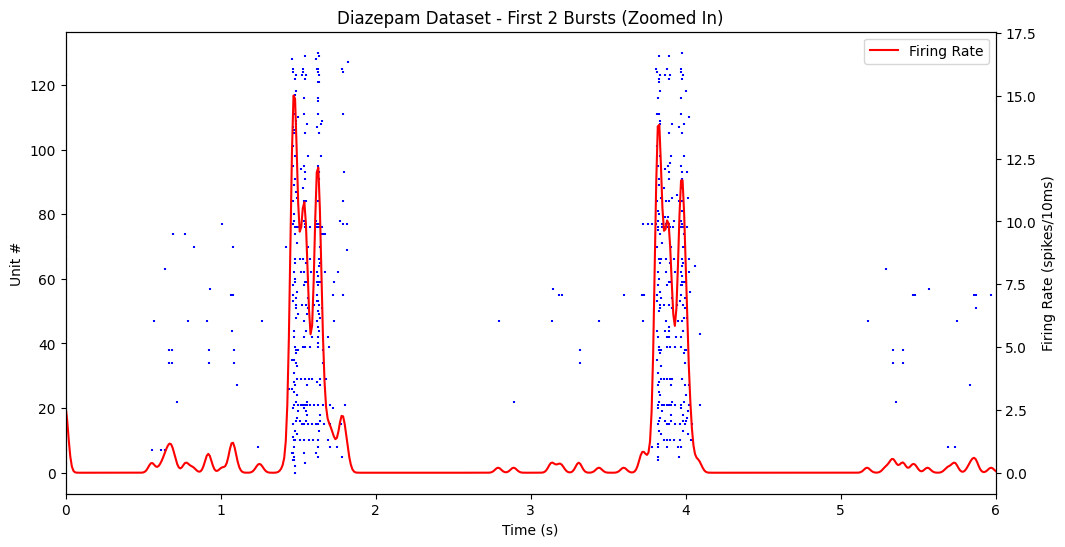

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def plot_first_two_bursts(sd, burst_window=(0, 8)):
    """
    Plots a zoomed-in spike raster and smoothed firing rate for the first 2 bursts.

    Parameters:
    sd : SpikeData object
        Loaded spike data (e.g., data_diazepam).
    burst_window : tuple
        Time window (in seconds) to zoom in on (default is first 8 seconds).
    """

    # Get spike raster coordinates
    idces, times = sd.idces_times()
    
    # Compute population firing rate (bin size = 10 ms)
    pop_rate = sd.binned(bin_size=10)

    if pop_rate.sum() == 0:
        print("Population firing rate is zero. Check your dataset.")
        return

    # Smooth firing rate
    pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float), sigma=2)

    # Create time axis in seconds
    t = np.linspace(0, sd.length, pop_rate.shape[0]) / 1000  # Convert ms to seconds

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Raster plot
    ax1.scatter(times / 1000, idces, marker='|', s=2, color='blue')
    ax1.set_xlim(burst_window)
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel('Unit #')

    # Overlay firing rate
    ax2 = ax1.twinx()
    ax2.plot(t, pop_rate_smooth, color='red', label='Firing Rate')
    ax2.set_ylabel('Firing Rate (spikes/10ms)')
    ax2.legend(loc='upper right')

    plt.title("Diazepam Dataset - First 2 Bursts (Zoomed In)")
    plt.show()

# Then call the function:
plot_first_two_bursts(data_diazepam, burst_window=(0, 6))



### Replicate Correlation and ISI (1.5 Points) <font color="green"> 

Plot the correlation matrix and the ISI histogram for the diazepam dataset. Briefly compare these plots to those from the control dataset.

<font color="green"><b>Answer

The correlation matrix for the Diazepam dataset indicates a higher and more widespread level of synchronization between neurons compared to the control dataset. This suggests that diazepam enhances coordinated neuronal firing, likely due to its effect on increasing GABAergic inhibition, which promotes synchronized network activity. In contrast, the control dataset displays lower and more dispersed correlations, reflecting more independent and irregular neuronal firing. 

Additionally, the ISI histogram for the Diazepam dataset shows a bimodal distribution, indicating structured and rhythmic firing patterns consistent with burst-like activity. In comparison, the control dataset's ISI histogram features a sharp peak at shorter intervals followed by a gradual decline, suggesting more spontaneous and less organized firing behavior. 

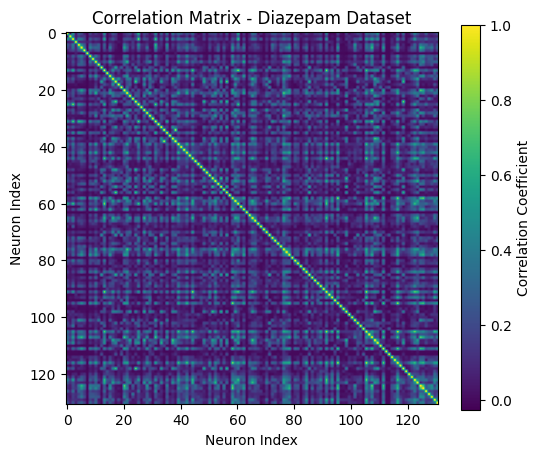

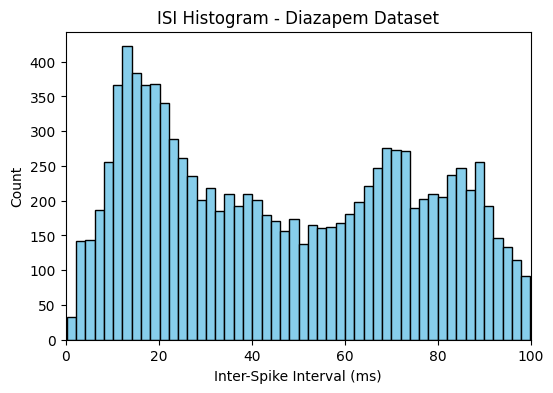

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def correlation_matrix(sd):
    dense_raster = sd.raster(bin_size=1)  # 1 ms bins
    sigma = 5
    smoothed_raster = gaussian_filter1d(dense_raster.astype(float), sigma=sigma)

    corr = np.corrcoef(smoothed_raster)

    plt.figure(figsize=(6,5))
    plt.imshow(corr, cmap='viridis')
    plt.colorbar(label='Correlation Coefficient')
    plt.title('Correlation Matrix - Diazepam Dataset')
    plt.xlabel('Neuron Index')
    plt.ylabel('Neuron Index')
    plt.show()

correlation_matrix(data_diazepam)


def interspike(sd):
    """
    Plots the Inter-Spike Interval (ISI) histogram for the given spike dataset,
    focusing on intervals less than 100 ms to highlight rhythmic firing patterns.
    """
    # Get raw ISIs for all neurons
    isis_raw = sd.interspike_intervals()

    # Filter ISIs to include only intervals < 100 ms
    isis = []
    for neuron_isi in isis_raw:
        isis.extend(neuron_isi[neuron_isi < 100].tolist())

    # Plot the ISI histogram
    plt.figure(figsize=(6,4))
    plt.hist(isis, bins=50, color='skyblue', edgecolor='black')
    plt.xlim(0, 100)
    plt.xlabel('Inter-Spike Interval (ms)')
    plt.ylabel('Count')
    plt.title('ISI Histogram - Diazapem Dataset')
    plt.show()

interspike(data_diazepam)


## Correlation & Spike Time Tilling (9.5 Points)

### Correlation Matrix Equation

Given a matrix $X$, with $n$ random variables as its rows, write down the formula that the correlation matrix

<font color="green"><b>Answer

$$
R_{ij} = \frac{\mathrm{Cov}(X_i, X_j)}{\sigma_i \sigma_j}
$$

Where $\mathrm{Cov}(X_i, X_j)$ is the covariance between variables $i$ and $j$, and $\sigma_i$, $\sigma_j$ are their standard deviations.


### Diagonal of Correlation Matrix (1 Point)

What are the values on the diagonal of the correlation matrix? Why?

<font color="orange">**Hint:** If you need to, you can check the values of the diagonal in the source code. This is not necessary to receive full credit though.

<font color="green"><b>Answer

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def correlation(sd):
    # Generate dense raster and smooth it
    dense_raster = sd.raster(bin_size=1).astype(float)
    sigma = 5
    dense_raster = gaussian_filter1d(dense_raster, sigma=sigma)

    # Compute correlation matrix
    corr = np.corrcoef(dense_raster)

    # Print diagonal values
    diagonal_values = np.diag(corr)
    print("Diagonal values of the correlation matrix:")
    print(diagonal_values)

correlation(data_diazepam)


Diagonal values of the correlation matrix:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


For a correlation matrix, the diagonal values are always equal to 1. This is because each value on the diagonal represents the correlation of a neuron with itself. Since any variable is perfectly correlated with itself, the Pearson correlation coefficient is always 1 along the diagonal, indicating perfect linear correlation.

### Why STTC? (1.5 Points)

Briefly read through the paper on [spike time tilling](./reading_material/Spike_Time_Tiling.pdf). For electrophysiology, what is the advantage of using spike time tiling over correlation?

<font color="green"><b>Answer

Spike time tiling offers a significant advantage over traditional correlation methods in electrophysiology by providing a more accurate and reliable measure of neuronal synchrony. Unlike standard correlation techniques, which are often influenced by firing rates and periods of inactivity, spike time tiling focuses specifically on the timing of spikes within a defined window. This approach ensures that periods of silence are not mistakenly counted as correlated activity and that variations in firing rates do not distort the assessment of synchrony. As a result, spike time tiling allows for a fair comparison of neural activity across different conditions, regardless of differences in overall firing rates. By emphasizing meaningful temporal relationships between spikes, this method aligns more closely with biologically relevant processes, such as those involved in synaptic plasticity. 

### Plot STTC (2 Points)

Use the braingeneerspy package's [analysis code](https://github.com/braingeneers/braingeneerspy/blob/master/src/braingeneers/analysis/analysis.py) to create a plot of the STTC for both the control dataset and the diazepam dataset. 

<font color="orange"><b>Hint:</b> This is the same package used in the source code to create the other plots. You only need to write 2 lines of code to complete this exercise. In the code, by default `delt=20`, leave it that way.

<font color="green"><b>Answer

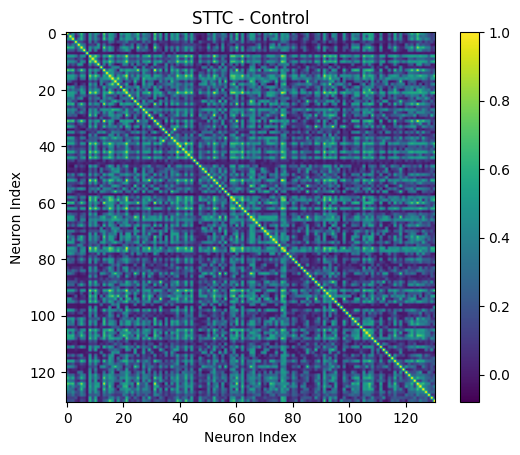

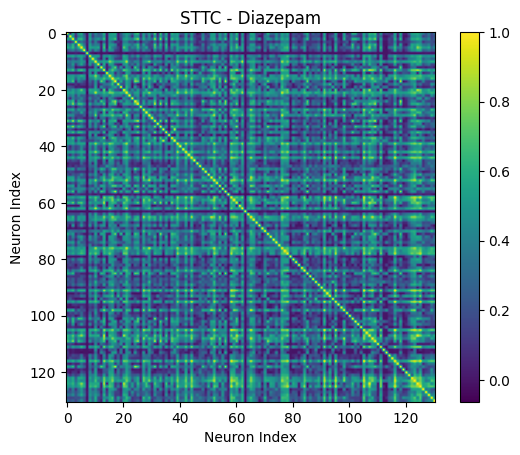

In [40]:
import matplotlib.pyplot as plt

# Compute STTC matrices
sttc_control = data_control.spike_time_tilings(delt=20)
sttc_diazepam = data_diazepam.spike_time_tilings(delt=20)

# Plot Control STTC
plt.imshow(sttc_control)
plt.colorbar()
plt.title("STTC - Control")
plt.xlabel("Neuron Index")
plt.ylabel("Neuron Index")
plt.show()

# Plot Diazepam STTC
plt.imshow(sttc_diazepam)
plt.colorbar()
plt.title("STTC - Diazepam")
plt.xlabel("Neuron Index")
plt.ylabel("Neuron Index")
plt.show()

### Compare Plots (1.5 Points)

Compare the two plots of the STTC. Does the variation between these plots make sense, considering our understanding of diazepam? Explain. Is the comparison between these two plots consistent with the variation you see between the correlation matrices of both datasets?

<font color="green"><b>Answer

The differences between the two STTC plots align with our understanding of Diazepam's effects on neural activity. By enhancing inhibitory signaling through GABA_A receptor modulation, Diazepam promotes greate neuronal synchrony and more organized firing patterns. This is evident in the Diazepam STTC plot, which shows increased positive synchrony across neuron pairs, reflected by denser green regions, and a reduction in negative correlations. In contrast, the control plot displays weaker, more scattered synchrony with a greater presence of negative correlations, indicating a less coordinated and more variable firing pattern typical of untreated networkds. 

This variation is expected given Diazepam's role in facilitating synchronized, rythmic activity. A similar trend is observed in the correlation matrices, where the Diazepam dataset shows higher and more uniform positive correlations, while the control matrix exhibits more variability, including stronger negative correlations. While the STTC captures precise spike timing and the correlation matrix reflects broader firing rate relationships, both highlight that Diazepam enhances neuronal coordination by increasing positive correlations and reducing negative interactions. 

### Diagonal of STTC (1.5 Points)

What do the diagonal values of the STTC equal. Why is this the case?

<font color="green"><b>Answer

In [41]:
import numpy as np

# Compute STTC matrices
sttc_control = data_control.spike_time_tilings(delt=20)
sttc_diazepam = data_diazepam.spike_time_tilings(delt=20)

# Extract diagonal values
diag_control = np.diag(sttc_control)
diag_diazepam = np.diag(sttc_diazepam)

# Print unique values in diagonals to confirm they are all 1
print("Unique diagonal values in Control STTC matrix:", np.unique(diag_control))
print("Unique diagonal values in Diazepam STTC matrix:", np.unique(diag_diazepam))


Unique diagonal values in Control STTC matrix: [1.]
Unique diagonal values in Diazepam STTC matrix: [1.]


The diagonal values of the STTC matrix are equal to 1. This is because each diagonal element represents the Spike Time Tiling Coefficient of a neuron compared to itself. By definition, when a neuron’s spike train is compared to its own, the result reflects perfect synchrony, as every spike aligns exactly in time. Therefore, the STTC assigns the maximum possible value of 1 to these self-comparisons, indicating complete correlation. 